In [1]:
# Run this block only if you're using Google Colab
!pip install nltk
!pip install vaderSentiment
!pip install wordcloud
!pip install matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.3 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
from google.colab import files
uploaded = files.upload()


Saving Harry_porter.txt to Harry_porter (2).txt


In [20]:
# Replace the filename with the exact name you uploaded
filename = 'harry_potter.txt'  # Change if needed

with open(filename, 'r', encoding='utf-8') as f:
    raw_text = f.read()


In [26]:
import re

file_name = 'Harry_porter.txt'

with open(file_name, 'r', encoding='utf-8') as f:
    text = f.read()

# Split on CHAPTER followed by capital words like ONE, TWO, etc.
chapters = re.split(r'CHAPTER\s+[A-Z ]+', text)
chapters = [ch.strip() for ch in chapters if ch.strip()]

print(f"Total chapters: {len(chapters)}")


Total chapters: 18


In [27]:
import pandas as pd

df = pd.DataFrame({'chapter': range(1, len(chapters)+1), 'text': chapters})
df.head()


,chapter,text
0,1,Harry Potter and the Sorcerer's Stone
1,2,"THE BOY WHO LIVED\n\nMr. and Mrs. Dursley, of ..."
2,3,THE VANISHING GLASS\n\nNearly ten years had pa...
3,4,THE LETTERS FROM NO ONE\n\nThe escape of the B...
4,5,THE KEEPER OF THE KEYS\n\nBOOM. They knocked a...


In [29]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing resource

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Preprocessing setup
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

# Apply to each chapter
df['cleaned_text'] = df['text'].apply(preprocess)

# Sentiment analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Preview results
df[['chapter', 'sentiment']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,chapter,sentiment
0,1,0.0000
1,2,0.9993
2,3,-0.8336
3,4,0.9573
4,5,-0.9830


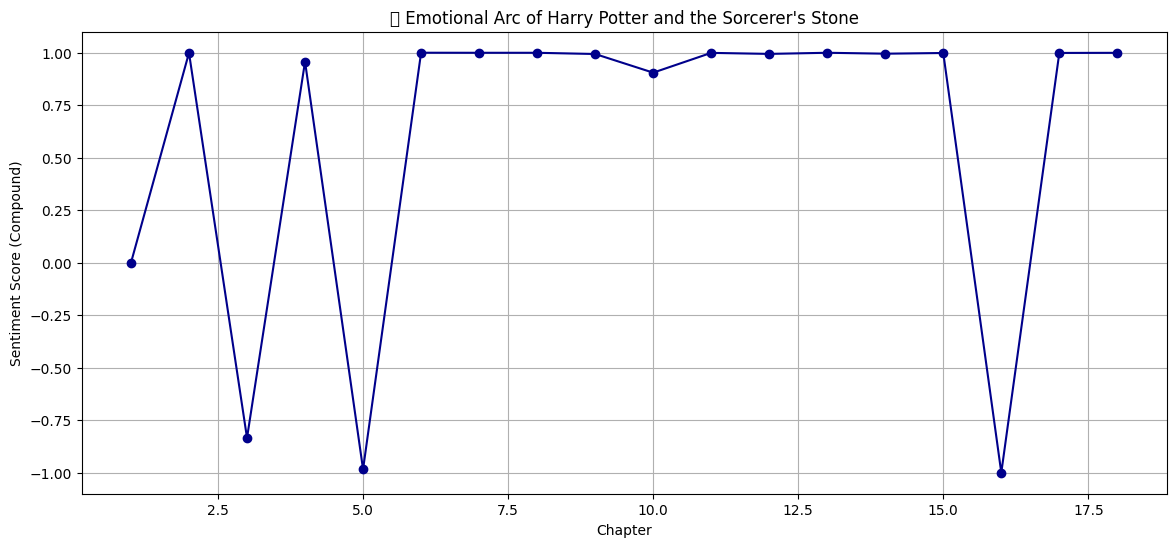

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['chapter'], df['sentiment'], marker='o', color='darkblue', linestyle='-')
plt.title("📈 Emotional Arc of Harry Potter and the Sorcerer's Stone")
plt.xlabel("Chapter")
plt.ylabel("Sentiment Score (Compound)")
plt.grid(True)
plt.show()


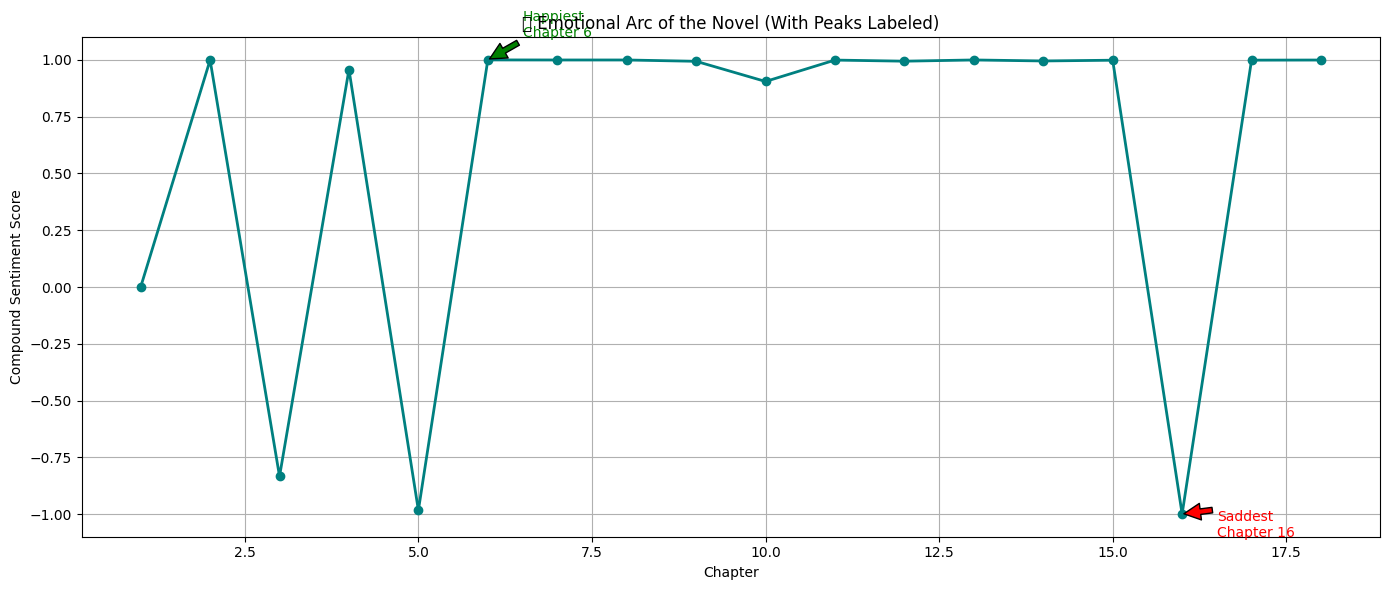

In [34]:
import matplotlib.pyplot as plt

# Get max and min sentiment rows
max_row = df.loc[df['sentiment'].idxmax()]
min_row = df.loc[df['sentiment'].idxmin()]

plt.figure(figsize=(14, 6))
plt.plot(df['chapter'], df['sentiment'], marker='o', color='teal', linewidth=2)

# Label happiest point
plt.annotate(f"Happiest\nChapter {max_row['chapter']}",
             xy=(max_row['chapter'], max_row['sentiment']),
             xytext=(max_row['chapter']+0.5, max_row['sentiment']+0.1),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=10, color='green')

# Label saddest point
plt.annotate(f"Saddest\nChapter {min_row['chapter']}",
             xy=(min_row['chapter'], min_row['sentiment']),
             xytext=(min_row['chapter']+0.5, min_row['sentiment']-0.1),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10, color='red')

# Labels & display
plt.title("📈 Emotional Arc of the Novel (With Peaks Labeled)")
plt.xlabel("Chapter")
plt.ylabel("Compound Sentiment Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
print(f"Happiest Chapter: Chapter {max_row['chapter']}")
print(f"Saddest Chapter: Chapter {min_row['chapter']}")

#

Happiest Chapter: Chapter 6
Saddest Chapter: Chapter 16
